# Beat the ATS - Project Description

###### According to Jobscan, 99% of Fortune 500 companies use an Applicant Tracking System (ATS) as their recruitment strategy.
###### All ATS' store candidates' information by using keywords, so it's easy to parse and filter them.
###### If applicant's resume does not meet certain criteria, it is either flagged or auto-rejected.
###### "Beat the ATS" Project aims to analyse the most popular tools and skills (keywords) for Data Analytics field and check if there is a relationship between those skills and earnings.

## Research Questions:
<b>All research questions are based on years 2020-2021 in the United States of America</b>
<br><br>
###### 1. What were the most popular technologies employers sought in Data Analytics field in the period 2020-2021? (Frequency analysis)
###### 2. What were the most popular tools employers sought? (Frequency analysis)
###### 3. What were the most popular soft skills? (Frequency analysis)
###### 4. Is there a relationship between education level and earnings? If yes, what is the relationship? (Regression analysis)
###### 5. Is there a relationship between years of experience and earnings? If yes, what is the relationship? (Regression analysis)
<br><br>
### Hypotheses:
###### 1. There are certain technologies that are more sought after than others.
###### 2. There are certain tools that are more sought after than others.
###### 3. There are certain soft skills that are sought after by employers.
###### 4. There is a correlation between education level and earnings.
###### 5. There is a correlation between experience level (measured in years) and earnings.


In [17]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Declare variables and import the data
job_descriptions = pd.read_csv("salary vs education vs experience.csv")
# salary_education_experience = pd.read_csv("salary vs education vs experience.csv")by Hamza

In [19]:
job_descriptions.head()

Year            Compant         Job Title  Annual Salary  \
0  2020                PwC  Business Analyst         115000   
1  2020  Fractal Analytics    Data Scientist          85000   
2  2020          Microsoft    Data Scientist         156000   
3  2020                PwC  Business Analyst          25000   
4  2020                SAP  Business Analyst          41000   

               Location  Years of Experience  Gender  Masters Degree  \
0       Los Angeles, CA                    5  Female               1   
1  Bangalore, KA, India                    4    Male               0   
2           Seattle, WA                    2    Male               0   
3    Moscow, MC, Russia                    8  Female               1   
4   Toronto, ON, Canada                    2    Male               0   

   Bachelors Degree  Doctorate Degree  Highschool  Some College  \
0                 0                 0           0             0   
1                 1                 0           0             0   
2                 0                 1           0             0   
3                 0                 0           0             0   
4                 1                 0           0             0   

           Education  
0    Master's Degree  
1  Bachelor's Degree  
2                PhD  
3    Master's Degree  
4  Bachelor's Degree

In [20]:
list_of_educations = job_descriptions['Education'].to_list()
list_of_salary = job_descriptions['Annual Salary'].to_list()
list_of_years = job_descriptions['Years of Experience'].to_list()
list_of_locations=job_descriptions['Location'].to_list()

In [21]:
my_dict = {
    "Salary": list_of_salary,
    "Education":list_of_educations,
    "Years_of_Experiance":list_of_years,
    "Location":list_of_locations
}

data = pd.DataFrame(my_dict)

In [22]:
data['Education'] = data['Education'].fillna(0)
print(data['Education'].unique())

["Master's Degree" "Bachelor's Degree" 'PhD' 0 'Some College' 'Highschool']


In [23]:
data = data[data.Education != 0]
bach_sal= data.loc[(data['Education'].str.contains("Bachelor's Degree")) & (data['Years_of_Experiance'] == 5)]
master_sal= data.loc[(data['Education'].str.contains("Master's Degree"))& (data['Years_of_Experiance'] == 5)]
phd_sal= data.loc[(data['Education'].str.contains("PhD"))& (data['Years_of_Experiance'] == 5)]
high_sal= data.loc[data['Education'].str.contains("Highschool")]
sc_sal= data.loc[data['Education'].str.contains("Some College")]
#high_sal= data.loc[(data['Education'].str.contains("Highschool"))& (data['Years_of_Experiance'] == 5)]
#sc_sal= data.loc[(data['Education'].str.contains("Some College"))& (data['Years_of_Experiance'] == 5)]
#Couldnt use filted high school and some college as there was no data left after filtering

In [24]:
bach_salary= bach_sal['Salary'].to_list()
bach_std=np.std(bach_salary)
bach_mean= np.mean(bach_salary)

master_salary= master_sal['Salary'].to_list()
master_std=np.std(master_salary)
master_mean= np.mean(master_salary)

phd_salary= phd_sal['Salary'].to_list()
phd_std=np.std(phd_salary)
phd_mean= np.mean(phd_salary)

high_salary= high_sal['Salary'].to_list()
high_std=np.std(high_salary)
high_mean= np.mean(high_salary)

sc_salary= sc_sal['Salary'].to_list()
sc_std=np.std(sc_salary)
sc_mean= np.mean(sc_salary)

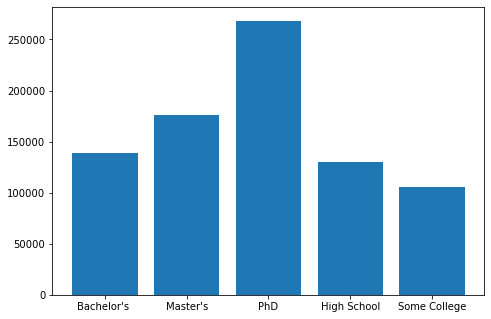

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
qualifications = ["Bachelor's ","Master's","PhD","High School","Some College"]
salary= [bach_mean,master_mean,phd_mean,high_mean,sc_mean]
ax.bar(qualifications,salary)
plt.show()

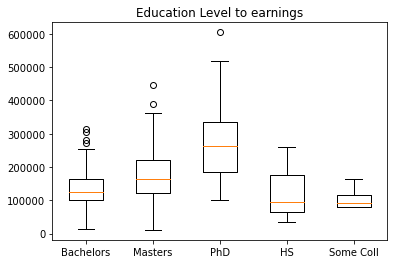

In [26]:
dataplot = [bach_sal['Salary'], master_sal['Salary'], phd_sal['Salary'],high_sal['Salary'],sc_sal['Salary']]
fig7, ax7 = plt.subplots()
ax7.set_title('Education Level to earnings')
ax7.boxplot(dataplot)
plt.xticks([1, 2, 3, 4, 5], ['Bachelors', 'Masters', 'PhD','HS','Some Coll'])
plt.show()

In [28]:
data.Location.value_counts()

San Francisco, CA        193
Seattle, WA              160
New York, NY             142
San Jose, CA              55
Menlo Park, CA            48
                        ... 
Antioch, TN                1
Mississippi State, MS      1
Italy, TX                  1
King of Prussia, PA        1
Round Rock, TX             1
Name: Location, Length: 210, dtype: int64